# Introvert VS Extrovert Behavior Model using Logistic Regression and Random Forest


## Data Analysis


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load Dataset
df = pd.read_csv("personality_dataset.csv")

# Drop null rows 
df = df.dropna()

# Encode categorical Yes/No -> 1/0
df["Stage_fear"] = df["Stage_fear"].map({"Yes": 1, "No": 0})
df["Drained_after_socializing"] = df["Drained_after_socializing"].map({"Yes": 1, "No": 0})

# Encode target Introvert=0, Extrovert=1
df["Personality"] = df["Personality"].map({"Introvert": 0, "Extrovert": 1})

# Features and Target
X = df.drop("Personality", axis=1)
y = df["Personality"]

# Data Splitting
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (1733, 7)
Validation shape: (372, 7)
Test shape: (372, 7)


## Logistic Regression

=== Logistic Regression (Validation) ===
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       180
           1       0.94      0.93      0.93       192

    accuracy                           0.93       372
   macro avg       0.93      0.93      0.93       372
weighted avg       0.93      0.93      0.93       372

=== Logistic Regression (Test) ===
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       181
           1       0.95      0.94      0.94       191

    accuracy                           0.94       372
   macro avg       0.94      0.94      0.94       372
weighted avg       0.94      0.94      0.94       372



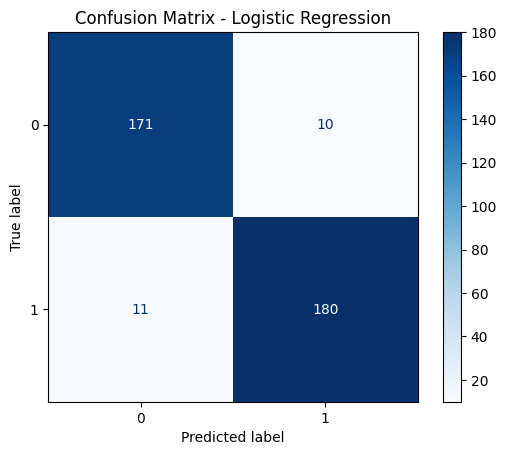

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
 
# Train Logistic Regression 
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Predictions
y_val_pred_lr = lr.predict(X_val_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)
 
# Validation metrics 
print("=== Logistic Regression (Validation) ===")
print(classification_report(y_val, y_val_pred_lr))
 
# Test metrics 
print("=== Logistic Regression (Test) ===")
print(classification_report(y_test, y_test_pred_lr))
 
# Confusion Matrix (Test) 
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Random Forest

=== Random Forest (Validation) ===
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       180
           1       0.91      0.91      0.91       192

    accuracy                           0.91       372
   macro avg       0.91      0.91      0.91       372
weighted avg       0.91      0.91      0.91       372

=== Random Forest (Test) ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       181
           1       0.93      0.93      0.93       191

    accuracy                           0.93       372
   macro avg       0.93      0.93      0.93       372
weighted avg       0.93      0.93      0.93       372



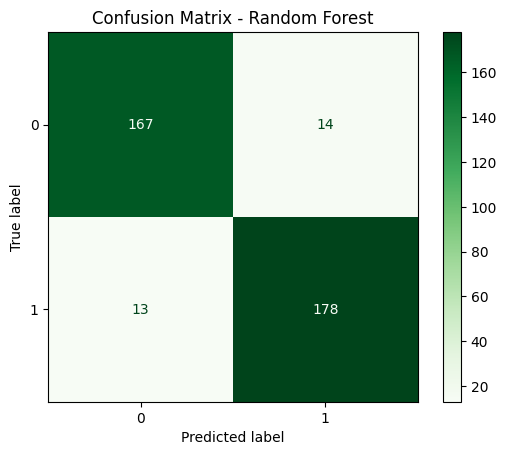

In [7]:
from sklearn.ensemble import RandomForestClassifier
 
# Train Random Forest 
rf = RandomForestClassifier(
    n_estimators=200,   
    random_state=42
)
rf.fit(X_train, y_train)   

# Predictions
y_val_pred_rf = rf.predict(X_val)
y_test_pred_rf = rf.predict(X_test)
 
# Validation metrics 
print("=== Random Forest (Validation) ===")
print(classification_report(y_val, y_val_pred_rf))
 
# Test metrics 
print("=== Random Forest (Test) ===")
print(classification_report(y_test, y_test_pred_rf))
 
# Confusion Matrix (Test) 
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## Logistic Regression vs Random Forest (Comparison)

=== Model Comparison (Test Set) ===
                     accuracy  precision    recall        f1
Logistic Regression  0.943548   0.947368  0.942408  0.944882
Random Forest        0.927419   0.927083  0.931937  0.929504


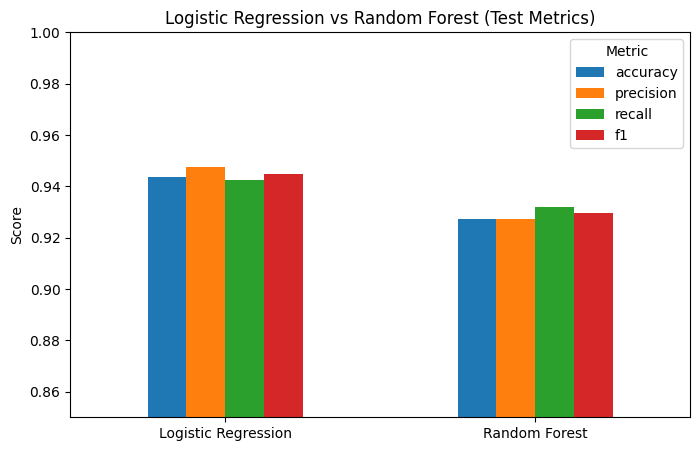

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
metrics = {
    "Logistic Regression": {
        "accuracy": accuracy_score(y_test, y_test_pred_lr),
        "precision": precision_score(y_test, y_test_pred_lr),
        "recall": recall_score(y_test, y_test_pred_lr),
        "f1": f1_score(y_test, y_test_pred_lr),
    },
    "Random Forest": {
        "accuracy": accuracy_score(y_test, y_test_pred_rf),
        "precision": precision_score(y_test, y_test_pred_rf),
        "recall": recall_score(y_test, y_test_pred_rf),
        "f1": f1_score(y_test, y_test_pred_rf),
    }
}
 
results_df = pd.DataFrame(metrics).T
print("=== Model Comparison (Test Set) ===")
print(results_df)
 
# Plot side-by-side comparison 
results_df.plot(kind="bar", figsize=(8,5))
plt.title("Logistic Regression vs Random Forest (Test Metrics)")
plt.ylabel("Score")
plt.ylim(0.85, 1.0)
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.show()
